In [2]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [3]:
df = pd.read_csv("../logs/parser_random_walk.csv")
df

,Unnamed: 0,Scenario,Trial,Seed,Alpha,Beta,Gamma,Drones,Victims
0,0,RandomWalk,1,880879381715801850,0.0,0.1,0,32,75
1,1,RandomWalk,2,1726760884372734954,0.0,0.1,0,32,84
2,2,RandomWalk,3,4258223208824758363,0.0,0.1,0,32,59
3,3,RandomWalk,4,2933576904639372249,0.0,0.1,0,32,49
4,4,RandomWalk,5,1619482046725515514,0.0,0.1,0,32,87
...,...,...,...,...,...,...,...,...,...
1095,1095,RandomWalk,1096,555858737356473370,1.0,1.0,0,32,133
1096,1096,RandomWalk,1097,5692153937894976052,1.0,1.0,0,32,142
1097,1097,RandomWalk,1098,8642021537610145686,1.0,1.0,0,32,178
1098,1098,RandomWalk,1099,8533287634515682151,1.0,1.0,0,32,152


In [4]:
data = df.groupby(["Alpha", "Beta"], as_index=False).agg(Victims=("Victims", "mean"))
data

,Alpha,Beta,Victims
0,0.0,0.1,73.1
1,0.0,0.2,99.9
2,0.0,0.3,126.4
3,0.0,0.4,138.1
4,0.0,0.5,145.3
...,...,...,...
105,1.0,0.6,126.8
106,1.0,0.7,133.8
107,1.0,0.8,141.6
108,1.0,0.9,148.3


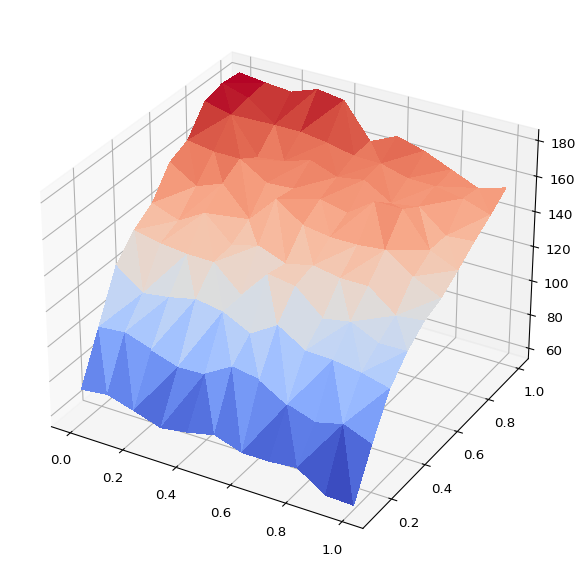

In [5]:
fig = plt.figure(figsize=(13.33,7.5), dpi = 96)
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(data["Alpha"], data["Beta"], data["Victims"], cmap=cm.coolwarm, edgecolor='none', linewidth=0, antialiased=False)

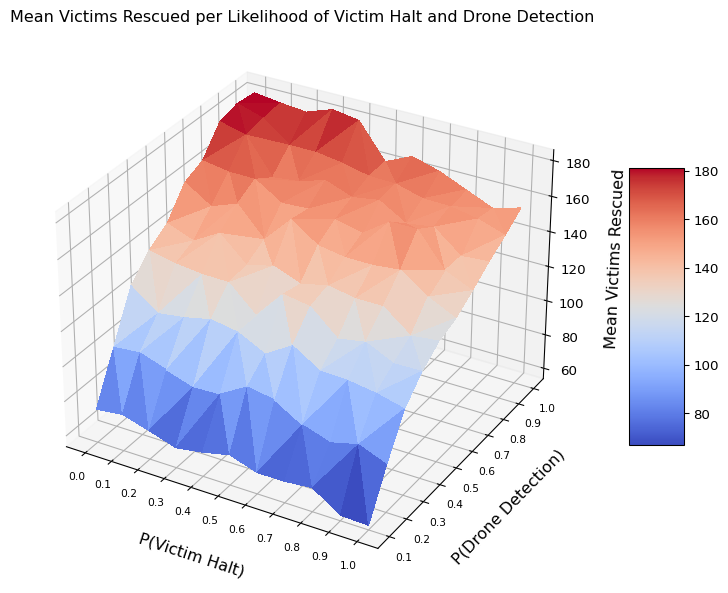

In [6]:
# Reformat x-axis label and tick labels
ax.set_xlabel("P(Victim Halt)", fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=8, labelrotation=0)
labels = ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
ax.set_xticks(data["Alpha"].unique(), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel("P(Drone Detection)", fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=8)
ax.set_yticks(data["Beta"].unique(), labels[1:])

# Reformat z-axis
ax.set_zlabel("Mean Victims Rescued", fontsize=12, labelpad=10)

# Format title
ax.set_title("Mean Victims Rescued per Likelihood of Victim Halt and Drone Detection")

fig.colorbar(surf, shrink=0.5, aspect=5)

fig

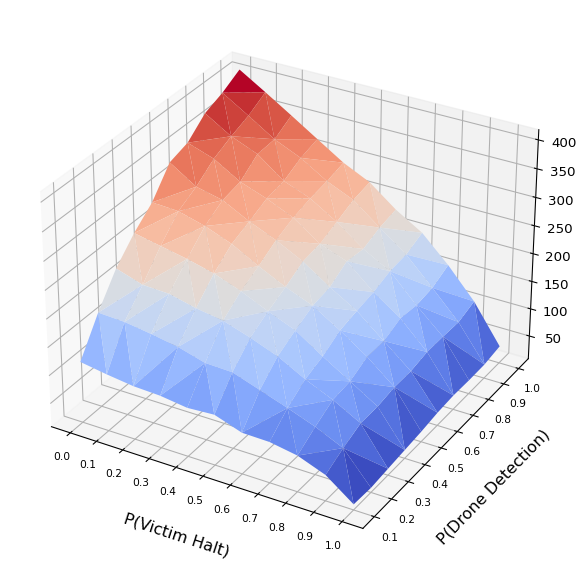

In [66]:
# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
# ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
# ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
# ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=1., z=0.1, s="Mean Victims Rescued per Victim Halt Likelihood", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=1., z=.93, s="Difference in victims rescued based on relative stagnation", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
# plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
# fig.patch.set_facecolor('white')

fig

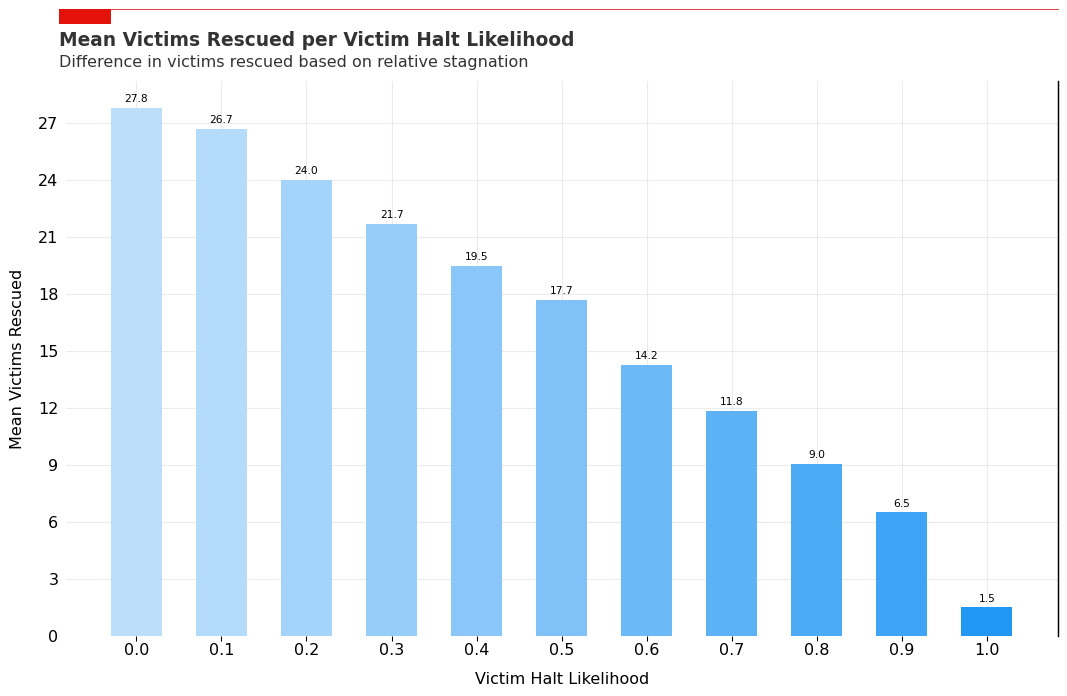

In [7]:
# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(data['Victims'].min(), data['Victims'].max()) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(data['Alpha'], data['Victims'], color=cmap(norm(data['Victims'])), width=0.06, zorder=2)

fig

In [8]:
# Find the average data point and split the series in 2
average = data['Victims'].mean()
below_average = data[data['Victims'] < average]
above_average = data[data['Victims'] >= average]

In [9]:
# Colours - Choose the extreme colours of the colour map
colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(data['Victims'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(average, above_average['Victims'].max())

# Plot bars and average (horizontal) line
bar1 = ax.bar(below_average['Alpha'], below_average['Victims'], color=cmap_low(norm_low(below_average['Victims'])), width=0.06, label='Below Average', zorder=2)
bar2 = ax.bar(above_average['Alpha'], above_average['Victims'], color=cmap_high(norm_high(above_average['Victims'])), width=0.06, label='Above Average', zorder=2)
ax.axhline(y=average, color = 'grey', linewidth=3)

# Determine the y-limits of the plot
ymin, ymax = ax.get_ylim()
# Calculate a suitable y position for the text label
y_pos = average/ymax + 0.03
# Annotate the average line
ax.text(0.88, y_pos, f'Average = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# Add legend
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)

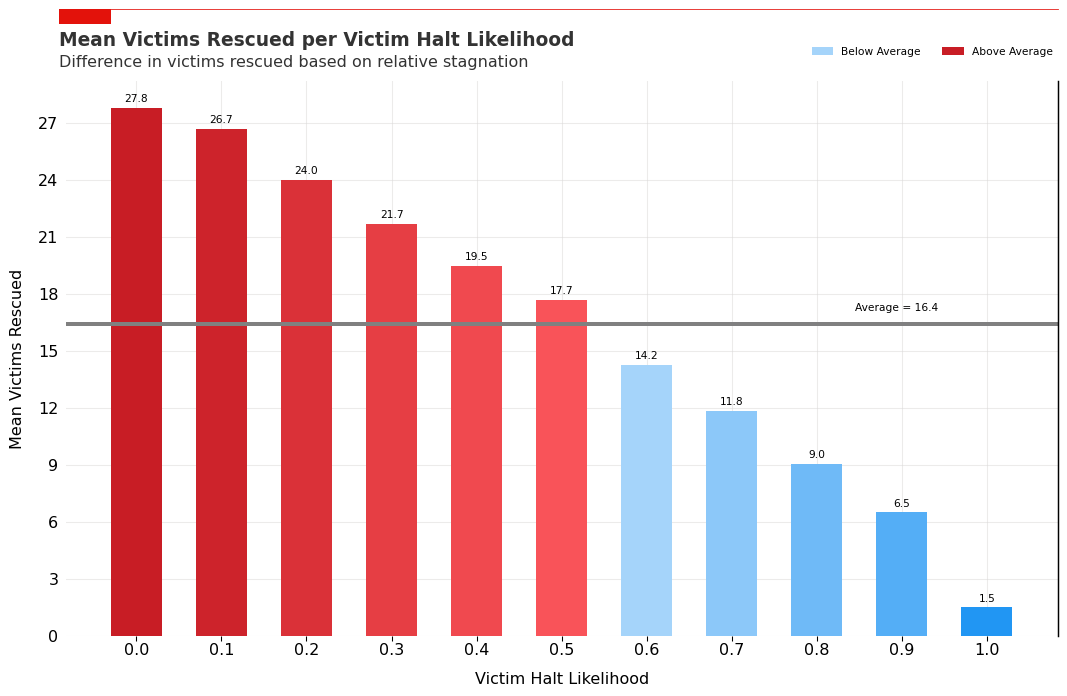

In [10]:
fig